# Linear Regression Training
## Boston house-prices dataset
* 506 examples
* 13 features
* the features are real and positive
* the targets are real in the range of 5 to 50

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [48]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [49]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

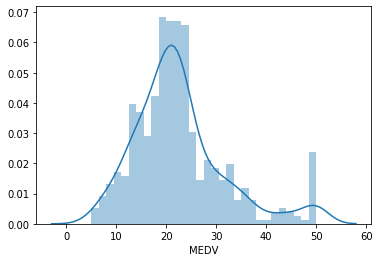

In [51]:
sns.distplot(df['MEDV'], bins=30)
plt.show()

## Fit a linear regression model to predict medv using LSTAT
### Do it in 3 different ways: analytically, sequantial learning and sklearn's builtin predictor.
### Compare your results

## Analytical Solution
$y' = wx$

$loss(y,y')=\frac{1}{n} \sum_{i=1}^{n}{(y'-y)^2} = \frac{1}{n} \sum_{i=1}^{n}{(wx-y)^2}$ (MSE loss)

$loss'(y,y')$  respect to $w$ is $\frac{2}{n} \sum_{i=1}^{n} {(wx-y)} \cdot{x}$

that is $\sum_{i=1}^{n}{x_i^2} \cdot w  = \sum_{i=1}^{n} {y_i \cdot x_i}$

notice that in general $x_i$ is a feature vector and $y_i$ is an entry in the target vector, but here we use only one
 feature, so the solution is easy:

$w = \sum_{i=1}^{n}{y_i} / \sum_{i=1}^{n}{x_i}$

In [52]:
w = sum(df['MEDV']) / sum(df['LSTAT'])
w

1.780818280501997

In [53]:
def pred(x):
    return w*x

In [54]:
df['A_PRED'] = df['LSTAT'].apply(pred)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,A_PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,8.868475
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,16.276679
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.176698
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,5.235606
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,9.491761


In [55]:
def pred_bias(x):
    return w*x + b

In [56]:
w = 0
b = 0
lr = 0.001
epochs = 10
X = df['LSTAT']
Y = df['MEDV']
n = len(X)

for i in range(epochs):
    Y_pred = w*X + b
    grad_w = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    grad_b = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    w = w - lr * grad_w
    b = b - lr * grad_b

In [57]:
df['SEQ_PRED'] = df['LSTAT'].apply(pred_bias)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,A_PRED,SEQ_PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,8.868475,5.740065
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,16.276679,10.340837
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.176698,4.689408
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,5.235606,3.483917
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,9.491761,6.127149


In [58]:
from sklearn.linear_model import LinearRegression

X = [[x] for x in df['LSTAT']]

model = LinearRegression()
model.fit(X,df['MEDV'])
preds = model.predict(X)

df['SK_PRED'] = preds
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,A_PRED,SEQ_PRED,SK_PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,8.868475,5.740065,29.822595
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,16.276679,10.340837,25.870390
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,7.176698,4.689408,30.725142
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,5.235606,3.483917,31.760696
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,9.491761,6.127149,29.490078


### The SKLREAN wins (the analytical solution is without bias)

## Use another feature that is equal to two times lstat

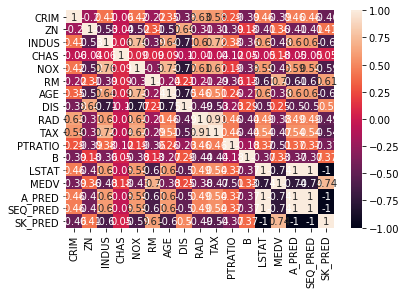

In [59]:
conf_matrix = df.corr().round(2)
sns.heatmap(data=conf_matrix, annot=True)
